In [1]:
import os
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast = load_breast_cancer()

In [115]:
X = pd.DataFrame(breast['data'],columns = breast.feature_names)
Y = breast['target']

In [6]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

<AxesSubplot:ylabel='count'>

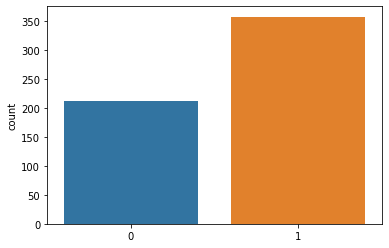

In [7]:
sns.countplot(x=Y)# 불균형 데이터 ->>> 이슈 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
tr_x,ts_x, tr_y, ts_y = train_test_split(X,Y, test_size = 0.2 ,random_state = 48)

In [10]:
from sklearn.tree import DecisionTreeClassifier as DT

In [11]:
dt = DT(random_state=0)#Deicision tree 하이파라미터 세팅

In [12]:
#Training 단계
dt.fit(tr_x,tr_y)

DecisionTreeClassifier(random_state=0)

In [13]:
pred = dt.predict(ts_x)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
print(confusion_matrix(y_true=ts_y, y_pred = pred,labels=[0,1]))

[[43  3]
 [ 5 63]]


In [16]:
pred_proba = dt.predict_proba(tr_x)

In [20]:
pred_proba = dt.predict_proba(tr_x)

In [21]:
# 예측 완료`b
ts_y

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0])

In [22]:
pred_y = dt.predict(ts_x)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score,balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score,f1_score


In [30]:
print(confusion_matrix(y_true=ts_y, y_pred=pred_y,labels=[1,0]))

[[63  5]
 [ 3 43]]


In [24]:
acc = accuracy_score(y_true=ts_y, y_pred=pred_y)
recall = recall_score(y_true=ts_y, y_pred=pred_y)
precision = precision_score(y_true=ts_y, y_pred=pred_y)

print('acc={:.3f}, specifity={:.3f}, ~={:.3f}'.format(acc,recall,precision))

acc=0.930, specifity=0.926, ~=0.955


In [25]:
acc = accuracy_score(y_true=ts_y, y_pred=pred_y)
recall = recall_score(y_true=ts_y, y_pred=pred_y,pos_label=0)
precision = precision_score(y_true=ts_y, y_pred=pred_y,pos_label=0)
f1 = f1_score(y_true=ts_y, y_pred=pred_y,pos_label=0)
print('acc={:.3f}, recall={:.3f}, precision={:.3f}'.format(acc,recall,precision))
print('f1={:.3f}'.format(f1))

acc=0.930, recall=0.935, precision=0.896
f1=0.915


In [26]:
balanced_accuracy_score(y_true=ts_y, y_pred=pred_y)

0.9306265984654731

In [31]:
##KNN VS Decision Tree

In [ ]:
##Visualization of Decision Tree

In [33]:
from sklearn import tree

In [100]:
dt = DT(criterion='gini',random_state=0)

dt.fit(tr_x,tr_y) 

DecisionTreeClassifier(random_state=0)

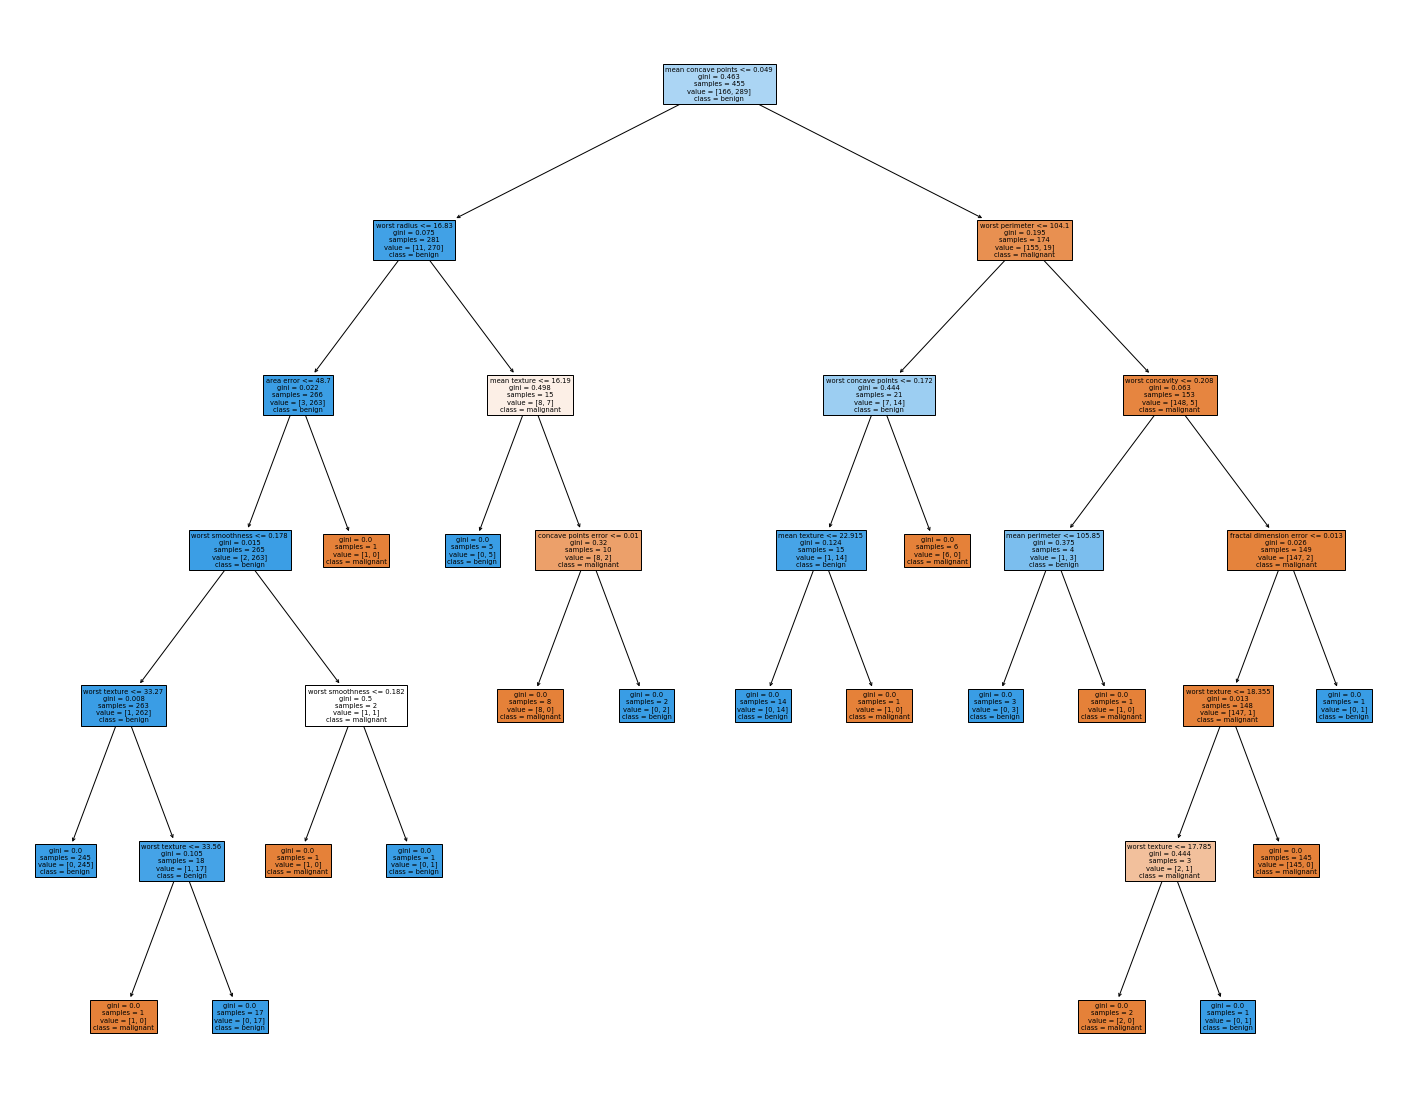

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=breast['feature_names'],  
                   class_names=breast['target_names'],
                   filled=True)
fig.savefig('tree.png')

In [111]:
text_representation = tree.export_text(dt,feature_names =  list(breast['feature_names']))
print(text_representation)

|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst texture >  33.27
|   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- worst smoothness >  0.18
|   |   |   |   |   |--- class: 1
|   |   |--- area error >  48.70
|   |   |   |--- class: 0
|   |--- worst radius >  16.83
|   |   |--- mean texture <= 16.19
|   |   |   |--- class: 1
|   |   |--- mean texture >  16.19
|   |   |   |--- concave points error <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- concave points error >  0.01
|   |   |   |   |--- class: 1
|--- mean concave points > 

In [112]:
from sklearn.cluster import AgglomerativeClustering as HCC

In [113]:
hcc = HCC()

In [116]:
hcc.fit(X)

AgglomerativeClustering()

In [117]:
hcc.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [121]:
method = 'ward' 
metric = 'euclidean'
D = linkage(X, method=method, metric=metric)

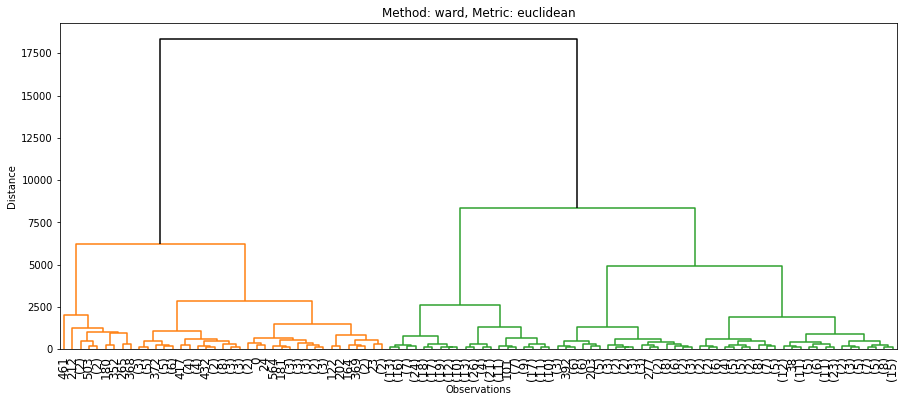

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
dendrogram(Z=D,
           p=100,
           truncate_mode='lastp',
           orientation='top',
           show_leaf_counts=True,
           no_labels=False,
           leaf_font_size=12.,
           leaf_rotation=90.,
           above_threshold_color='k')
ax.set_xlabel('Observations')
ax.set_ylabel('Distance')
ax.set_title('Method: {}, Metric: {}'.format(method, metric))
plt.show(fig)